In [82]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA

In [61]:
uci_test = pd.read_csv('./Data/UCI HAR Data Frame/uci_test.csv')
uci_train = pd.read_csv('./Data/UCI HAR Data Frame/uci_train.csv')
uci_df = pd.concat([uci_train,uci_test])

In [70]:
uci_df

subject          activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
0           1          STANDING           0.288585          -0.020294   
1           1          STANDING           0.278419          -0.016411   
2           1          STANDING           0.279653          -0.019467   
3           1          STANDING           0.279174          -0.026201   
4           1          STANDING           0.276629          -0.016570   
...       ...               ...                ...                ...   
2942       24  WALKING_UPSTAIRS           0.310155          -0.053391   
2943       24  WALKING_UPSTAIRS           0.363385          -0.039214   
2944       24  WALKING_UPSTAIRS           0.349966           0.030077   
2945       24  WALKING_UPSTAIRS           0.237594           0.018467   
2946       24  WALKING_UPSTAIRS           0.153627          -0.018437   

      tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
0             -0.132905         -0.995279         -0.983111         -0.913526   
1             -0.123520         -0.998245         -0.975300         -0.960322   
2             -0.113462         -0.995380         -0.967187         -0.978944   
3             -0.123283         -0.996091         -0.983403         -0.990675   
4             -0.115362         -0.998139         -0.980817         -0.990482   
...                 ...               ...               ...               ...   
2942          -0.099109         -0.287866         -0.140589         -0.215088   
2943          -0.105915         -0.305388          0.028148         -0.196373   
2944          -0.115788         -0.329638         -0.042143         -0.250181   
2945          -0.096499         -0.323114         -0.229775         -0.207574   
2946          -0.137018         -0.330046         -0.195253         -0.164339   

      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  ...  \
0            -0.995112         -0.983185  ...   
1            -0.998807         -0.974914  ...   
2            -0.996520         -0.963668  ...   
3            -0.997099         -0.982750  ...   
4            -0.998321         -0.979672  ...   
...                ...               ...  ...   
2942         -0.356083         -0.148775  ...   
2943         -0.373540         -0.030036  ...   
2944         -0.388017         -0.133257  ...   
2945         -0.392380         -0.279610  ...   
2946         -0.430974         -0.218295  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                           -0.074323                        -0.298676   
1                            0.158075                        -0.595051   
2                            0.414503                        -0.390748   
3                            0.404573                        -0.117290   
4                            0.087753                        -0.351471   
...                               ...                              ...   
2942                         0.074472                        -0.376278   
2943                         0.101859                        -0.320418   
2944                        -0.066249                        -0.118854   
2945                        -0.046467                        -0.205445   
2946                        -0.010386                        -0.072237   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.710304                    -0.112754   
1                           -0.861499                     0.053477   
2                           -0.760104                    -0.118559   
3                           -0.482845                    -0.036788   
4                           -0.699205                     0.123320   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179           

In [71]:
feature_cols = [c for c in uci_df.columns if c not in ('subject','activity')]
X = uci_df[feature_cols]
y = uci_df['activity']

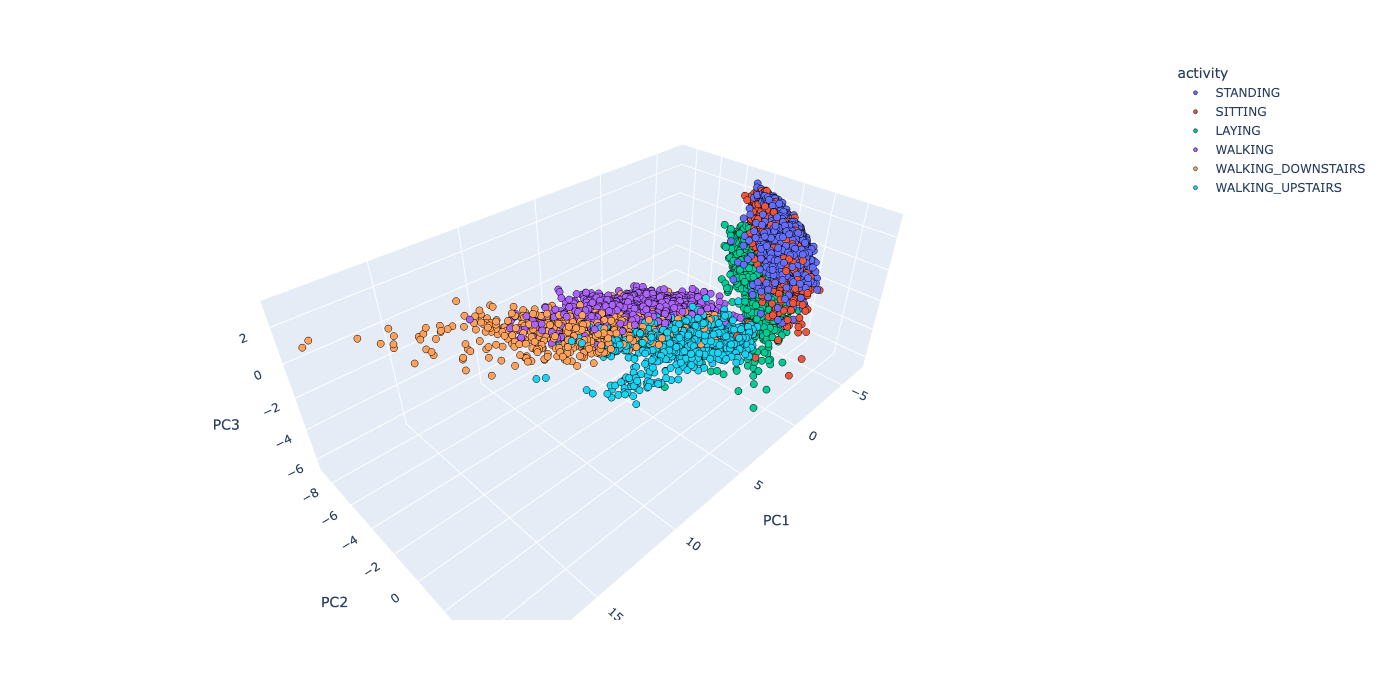

In [83]:
## Apply PCA 

pca = PCA(n_components=3, random_state=43)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
df_pca['activity'] = y.values

import plotly.express as px
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color='activity')
fig.update_traces(marker_line_color='black', marker_line_width=0.5, marker_size=4)
fig.update_layout(width=700, height=700)
fig.show()

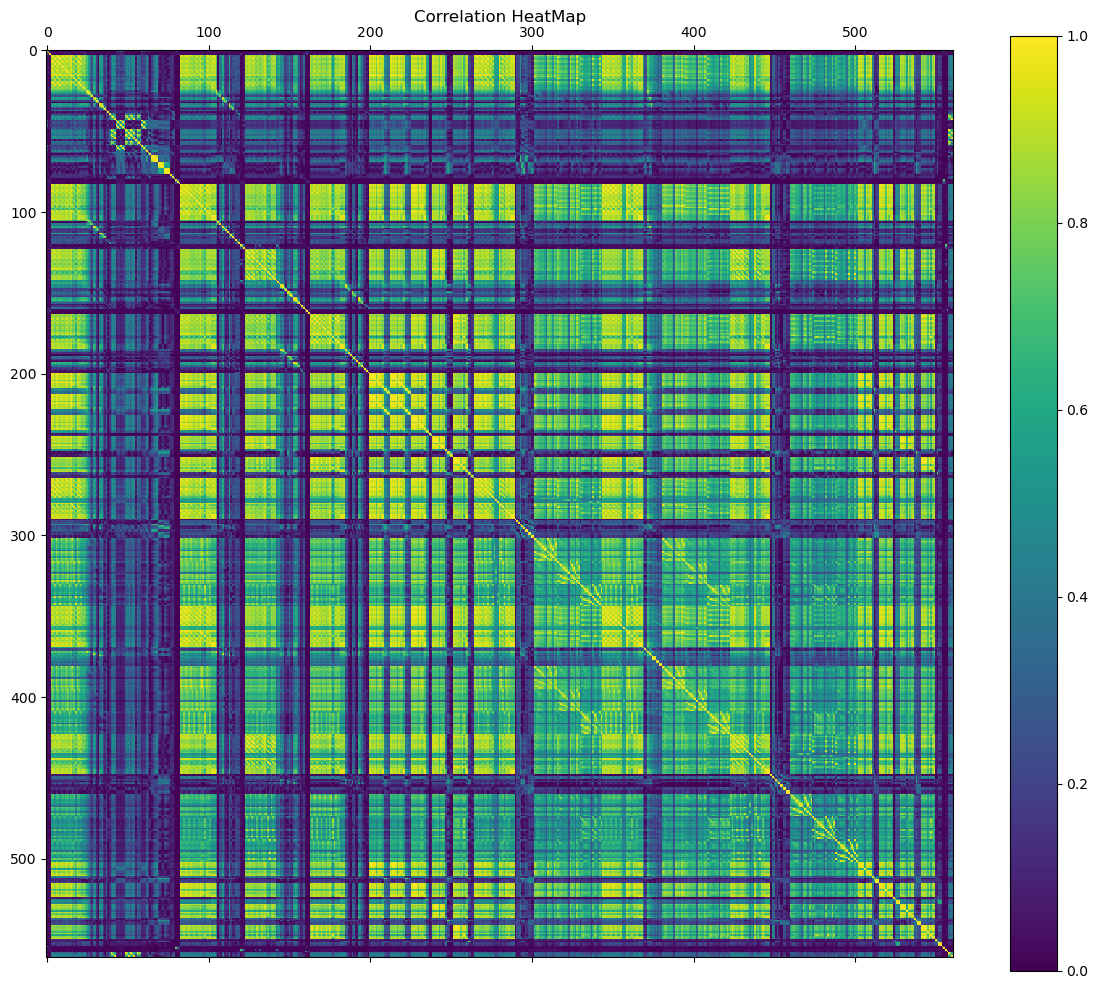

In [84]:
corr_matrix = X.corr().abs()
fig, ax = plt.subplots(figsize=(12,10))
cax = ax.matshow(corr_matrix, cmap='viridis', vmin=0, vmax=1)

fig.colorbar(cax)
plt.title('Correlation HeatMap', pad=20)
plt.tight_layout()
plt.show()

In [87]:
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper = corr_matrix.where(mask)
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
X_reduced = X.drop(columns=to_drop).copy()
print(f'Dropped {len(to_drop)} features.')
X_reduced

Dropped 357 features.


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Z  tBodyAcc-entropy()-X  \
0            -0.995279         -0.913526             -0.407747   
1            -0.998245         -0.960322             -0.714892   
2            -0.995380         -0.978944             -0.592235   
3            -0.996091         -0.990675             -0.627446   
4            -0.998139         -0.990482             -0.786553   
...                ...               ...                   ...   
2942         -0.287866         -0.215088              0.128951   
2943         -0.305388         -0.196373              0.311991   
2944         -0.329638         -0.250181              0.342902   
2945         -0.323114         -0.207574              0.194918   
2946         -0.330046         -0.164339              0.028807   

      tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0                -0.679338             -0.602122                0.929294   
1                -0.500930             -0.570979                0.611627   
2                -0.485821             -0.570979                0.273025   
3                -0.850930             -0.911872                0.061436   
4                -0.559477             -0.761434                0.313276   
...                    ...                   ...                     ...   
2942              0.250479              0.204483               -0.336571   
2943              0.277052              0.112971               -0.141648   
2944              0.411568              0.167789               -0.093074   
2945              0.383999              0.352585               -0.100123   
2946              0.213367              0.260762               -0.260698   

      tBodyAcc-arCoeff()-X,2  ...  fBodyBodyGyroMag-meanFreq()  \
0                  -0.853011  ...                    -0.128989   
1                  -0.329549  ...                    -0.271958   
2                  -0.086309  ...                    -0.212728   
3                   0.074840  ...                    -0.035684   
4                  -0.131208  ...                    -0.273582   
...                      ...  ...                          ...   
2942                0.119363  ...                     0.093839   
2943               -0.020623  ...                     0.092162   
2944               -0.146011  ...                    -0.122065   
2945               -0.218944  ...                    -0.220897   
2946               -0.052927  ...                     0.037595   

      fBodyBodyGyroMag-skewness()  fBodyBodyGyroJerkMag-min()  \
0                        0.586156                   -0.991048   
1                       -0.336310                   -0.994440   
2                       -0.535352                   -0.995866   
3                       -0.230091                   -0.995732   
4                       -0.510282                   -0.997418   
...                           ...                         ...   
2942                    -0.410787                   -0.770173   
2943                    -0.449349                   -0.947627   
2944                    -0.283911                   -0.930426   
2945                    -0.266982                   -0.785712   
2946       

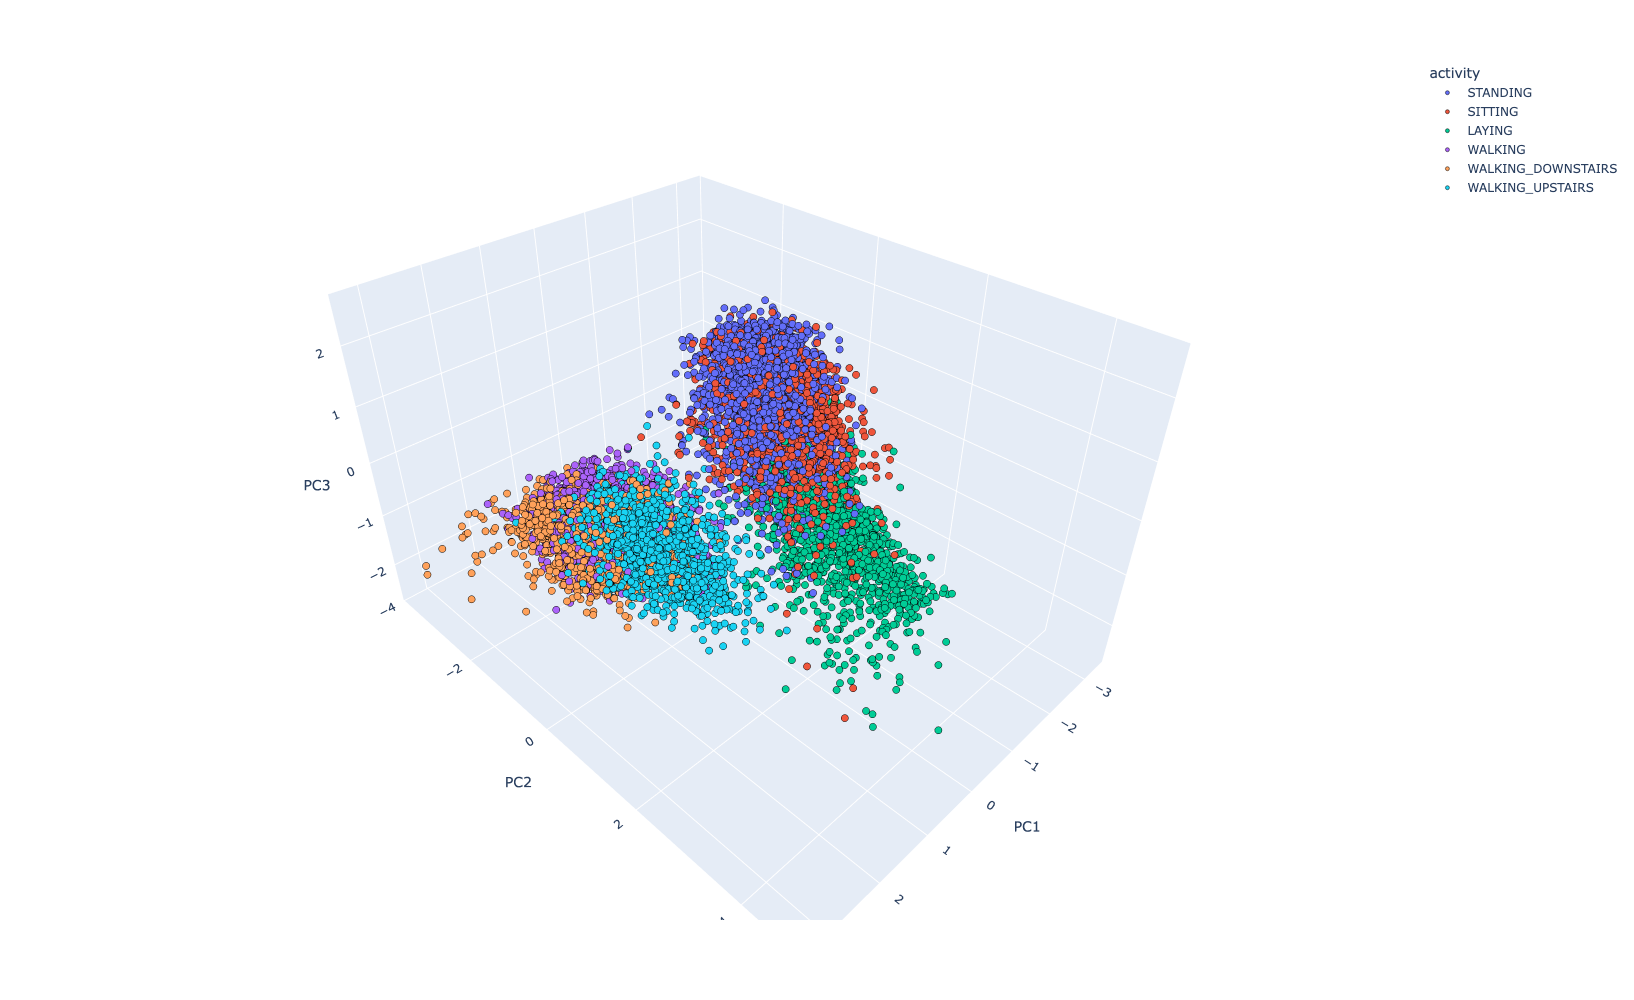

In [97]:
pca = PCA(n_components=3, random_state=43)
X_pca = pca.fit_transform(X_reduced)

df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
df_pca['activity'] = y.values

import plotly.express as px
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color='activity')
fig.update_traces(marker_line_color='black', marker_line_width=0.5, marker_size=4)
fig.update_layout(width=1000, height=1000)
fig.show()

In [96]:
## what drives the PC1 direction? 
loadings = pd.Series(pca.components_[0], index=X_reduced.columns)
sorted_loadings = loadings.abs().sort_values(ascending=False)
top_feats = sorted_loadings.head(10).index 
print(loadings[top_feats])

tBodyAcc-entropy()-X      0.235311
tBodyAcc-entropy()-Y      0.231534
tBodyAcc-std()-X          0.225113
tBodyAcc-std()-Z          0.209264
tBodyGyroMag-entropy()    0.205359
tBodyGyro-entropy()-Z     0.200584
tBodyAcc-entropy()-Z      0.185182
tBodyGyro-entropy()-X     0.159557
tGravityAcc-mean()-X      0.152797
tBodyGyro-entropy()-Y     0.145624
dtype: float64


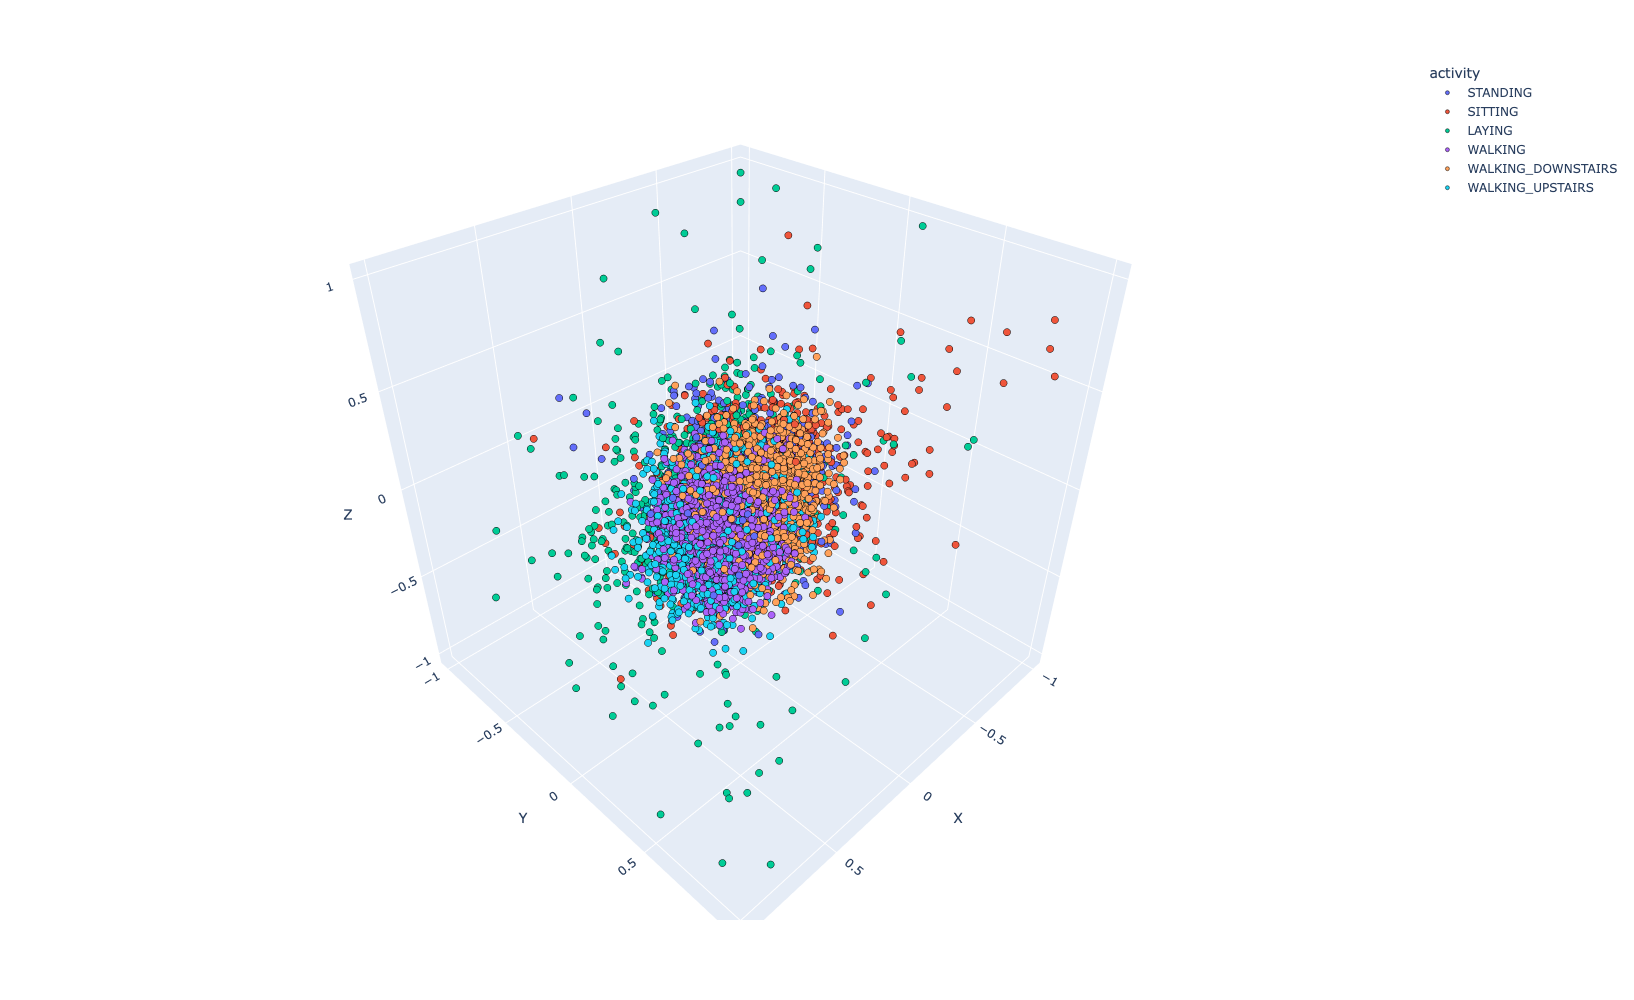

In [98]:
entropy = (c for c in X.columns if "tBodyAcc-entropy()-" in c)
X_ent = X[entropy]

df_plot = X_ent.copy()
df_plot['activity'] = y.values 

fig = px.scatter_3d(df_plot,
    x='tBodyAcc-entropy()-X',
    y='tBodyAcc-entropy()-Y',
    z='tBodyAcc-entropy()-Z',
    color='activity')

fig.update_traces(
    marker_line_color='black', 
    marker_line_width=0.5,     
    marker_size=4)

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'),width=1000,height=1000)

fig.show()